In [2]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Build model using LinearRegression

In [3]:
cars = pd.read_csv("final_cars.csv")

In [4]:
cars.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels',
       'length', 'width', 'curb-weight', 'engine-size', 'highway-mpg',
       'price'],
      dtype='object')

In [5]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [6]:
X.sample(5)

,make,fuel-type,num-of-doors,body-style,drive-wheels,length,width,curb-weight,engine-size,highway-mpg
76,mitsubishi,gas,two,hatchback,fwd,157.3,63.8,2145,98,30
55,mazda,gas,two,hatchback,rwd,169.0,65.7,2500,80,23
111,peugot,diesel,four,wagon,rwd,198.9,68.4,3485,152,25
93,nissan,gas,four,sedan,fwd,165.3,63.8,1971,97,37
66,mercedes-benz,diesel,two,hardtop,rwd,187.5,70.3,3495,183,25


In [7]:
X  = pd.get_dummies(X)

In [8]:
X.shape,y.shape

((201, 39), (201,))

In [9]:
X.columns

Index(['length', 'width', 'curb-weight', 'engine-size', 'highway-mpg',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]:.0f}")

length                    -28
width                     481
curb-weight               5
engine-size               37
highway-mpg               -74
make_alfa-romero          -1800
make_audi                 1600
make_bmw                  8167
make_chevrolet            237
make_dodge                -2003
make_honda                -1355
make_isuzu                -4552
make_jaguar               6703
make_mazda                -1334
make_mercedes-benz        5972
make_mercury              -1539
make_mitsubishi           -2911
make_nissan               -1820
make_peugot               -3694
make_plymouth             -2497
make_porsche              11534
make_renault              -3549
make_saab                 42
make_subaru               -2542
make_toyota               -2697
make_volkswagen           -1682
make_volvo                -281
fuel-type_diesel          76
fuel-type_gas             -76
num-of-doors_four         -8
num-of-doors_two          8
body-style_convertible    2989
body-style_h

In [15]:
model.intercept_

-27296.852210292334

### Calculate accuracy with train data

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
y_pred = model.predict(X_train)
print("MSE  : ", mean_squared_error(y_train,y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_train,y_pred)))

MSE  :  3813305.296046502
RMSE :  1952.7686232747858


In [19]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.93


### Test with test data

In [20]:
y_pred = model.predict(X_test)

In [21]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6304877.08
Root Mean Squared Error : 2510.95
Mean Absolute Error : 1668.38
R2 Score: 0.93


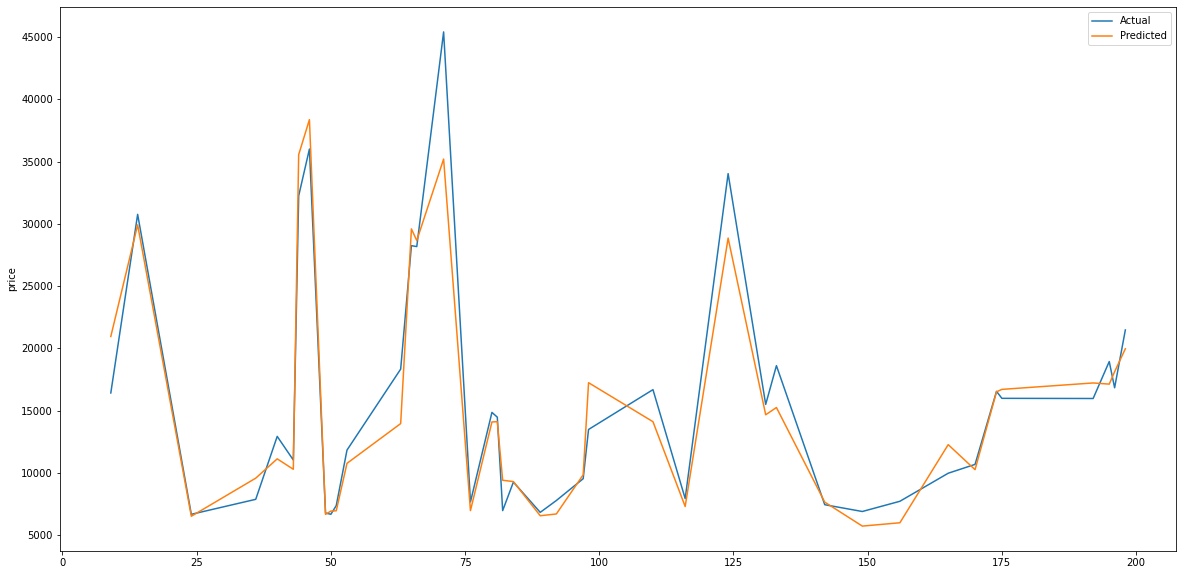

In [22]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [24]:
for p,a in zip(y_pred[:10],y_test[:10]):
    print(f"{p:6.0f}  :  {a:6.0f} : {p - a:6.0f}")

 35195  :   45400 : -10205
  6536  :    6692 :   -156
  6976  :    7395 :   -419
 16522  :   16558 :    -36
  9863  :    9549 :    314
 11143  :   12945 :  -1802
 28856  :   34028 :  -5172
  9317  :    9279 :     38
  7670  :    7463 :    207
 14680  :   15510 :   -830


In [25]:
# Display % of difference 
for p,a in zip(y_pred[:10],y_test[:10]):
    d = p - a
    print(f"{p:6.0f}  :  {a:6.0f} : {p - a:6.0f} : {abs(d / a * 100):5.2f}")

 35195  :   45400 : -10205 : 22.48
  6536  :    6692 :   -156 :  2.33
  6976  :    7395 :   -419 :  5.66
 16522  :   16558 :    -36 :  0.22
  9863  :    9549 :    314 :  3.29
 11143  :   12945 :  -1802 : 13.92
 28856  :   34028 :  -5172 : 15.20
  9317  :    9279 :     38 :  0.41
  7670  :    7463 :    207 :  2.77
 14680  :   15510 :   -830 :  5.35


## Model with Standardization 

In [26]:
cars = pd.read_csv("final_cars.csv")

In [27]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [28]:
X = pd.get_dummies(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
## Scale X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train = pd.DataFrame(X_train,columns = X.columns)

In [33]:
X_test = pd.DataFrame(X_test,columns = X.columns)

In [34]:
X_test.sample(5)

,length,width,curb-weight,engine-size,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
1,-1.306820,-0.956277,-1.071322,-0.923353,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,4.358899,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
25,1.135097,2.175108,1.969120,1.643338,-0.906693,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,...,-1.148408,1.148408,-0.197386,5.567764,-0.733799,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
20,0.269915,-0.474525,-0.251654,-0.426574,-0.314567,-0.138233,-0.197386,5.066228,-0.138233,-0.229416,...,-1.148408,1.148408,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,-1.224745,1.362770
26,2.056881,1.259780,1.545154,-0.095388,-1.054724,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,-0.916013,2.645751,-0.229416,-1.224745,1.362770
8,0.003083,-0.185474,-0.463637,-0.426574,0.129528,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,-0.916013,2.645751,-0.229416,0.816497,-0.733799


In [35]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [38]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6304877.08
Root Mean Squared Error : 2510.95
Mean Absolute Error : 1668.38
R2 Score: 0.93


### Micro model with 2 features 

In [39]:
# Micro model
X_micro =  X[['engine-size','highway-mpg']]
y_micro =  y

In [40]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [41]:
micro_model = LinearRegression(normalize=True)
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression(normalize=True)

In [42]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7796926906820935

In [43]:
y_micro_pred = micro_model.predict(X_micro_test)

In [44]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.79


## RandomForestRegressor 

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [47]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9861279412956999


In [48]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.94


In [49]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  5537861.367040845
RMSE :  2353.2661062958528


In [50]:
for f,v in zip (X_train.columns, model.feature_importances_):
      print(f"{f:30} {v:0.2f}")

length                         0.01
width                          0.04
curb-weight                    0.28
engine-size                    0.55
highway-mpg                    0.08
make_alfa-romero               0.00
make_audi                      0.00
make_bmw                       0.02
make_chevrolet                 0.00
make_dodge                     0.00
make_honda                     0.00
make_isuzu                     0.00
make_jaguar                    0.00
make_mazda                     0.00
make_mercedes-benz             0.00
make_mercury                   0.00
make_mitsubishi                0.00
make_nissan                    0.00
make_peugot                    0.00
make_plymouth                  0.00
make_porsche                   0.00
make_renault                   0.00
make_saab                      0.00
make_subaru                    0.00
make_toyota                    0.00
make_volkswagen                0.00
make_volvo                     0.00
fuel-type_diesel            

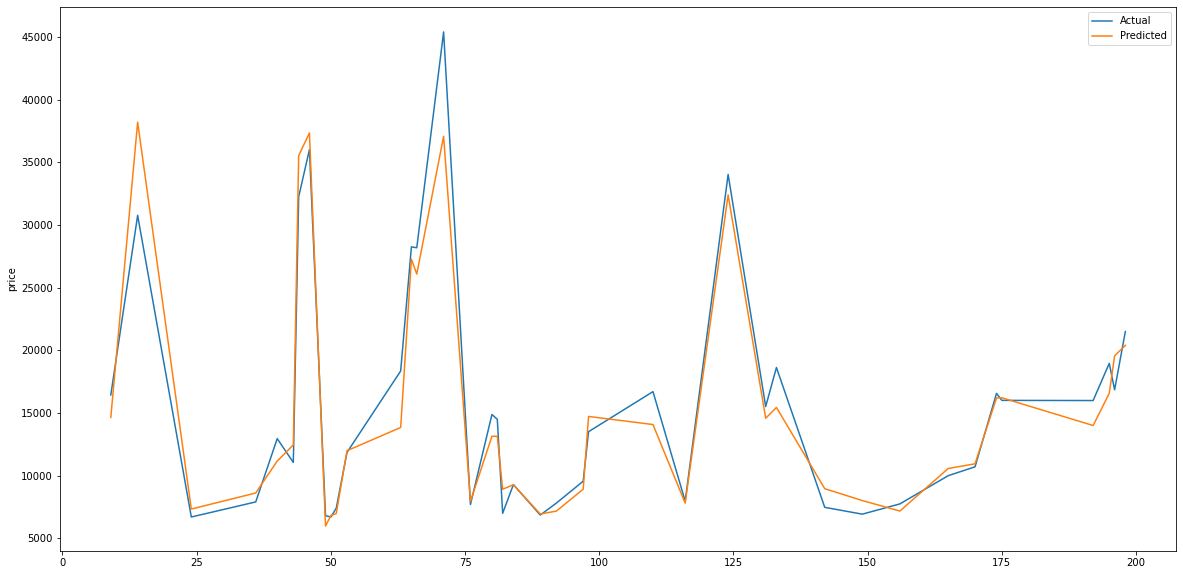

In [51]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [52]:
from sklearn.linear_model import SGDRegressor

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
## use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
model = SGDRegressor(random_state=100, penalty="l1")
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9291436953916226


In [57]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.93


In [58]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6344656.140309153
RMSE :  2518.860087481866
